In [1]:
from base import dados
from base.dados import carregar_dados, top_10_melhores_avaliados
# Carregar os dados usando a função do módulo dados
df = dados.carregar_dados()

# Chame a função para tratar os dados
df_tratado = dados.tratamento_de_dados(df)

# Calcular estatísticas para jogos de RPG
estatisticas_rpg = dados.calcular_estatisticas_rpg(df)
df_rpg = estatisticas_rpg['df_rpg']


<h5>Instalando bibliotecas necessárias</h5>

In [2]:
!pip install matplotlib
!pip install seaborn
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: python-apt 2.2.1pop0-1628521831-21.10-5dbe6cf has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-apt or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.39ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: python-apt 2.2.1pop0-1628521831-21.10-5dbe6cf has a non-standard version number. pip 23.3 will enforce

<h3>Verificando o tipo de dados</h3>

In [3]:
tipos_de_dados = dados.verificar_tipos_de_dados(df, ['AppID', 'Name', 'Price', 'Metacritic score','Genres', 'DLC count', 'Positive', 'Negative', 'Release date', 'Movies', 'Screenshots']) 
print(tipos_de_dados)


AppID                 int64
Name                 object
Price               float64
Metacritic score      int64
Genres               object
DLC count             int64
Positive              int64
Negative              int64
Release date         object
Movies               object
Screenshots          object
dtype: object


<h4><b>Pergunta 1:</b> Qual o percentual de jogos gratuitos e pagos na plataforma? </h4>

In [4]:
# Calcular a quantidade de jogos gratuitos e pagos
total_jogos = df.shape[0]
jogos_gratuitos = df[df['Price'] == 0].shape[0]
jogos_pagos = df[df['Price'] > 0].shape[0]

porcentagem_gratuitos = (jogos_gratuitos / total_jogos) * 100
porcentagem_pagos = (jogos_pagos / total_jogos) * 100

print(f"Porcentagem de jogos gratuitos: {porcentagem_gratuitos:.2f}%")
print(f"Porcentagem de jogos pagos: {porcentagem_pagos:.2f}%")

Porcentagem de jogos gratuitos: 17.39%
Porcentagem de jogos pagos: 82.61%


<h4><b>Pergunta 2:</b> Quais são os dez jogos mais bem avaliados, de acordo com o Metacritic? No caso de notas repetidas, ordenar os jogos de acordo com suas datas de lançamento (do mais velho para o mais recente). </h4>

In [5]:
# Obter os 10 jogos mais bem avaliados
top_10 = top_10_melhores_avaliados(df)

# Imprimir a lista dos 10 jogos mais bem avaliados com notas e datas
colunas_desejadas = ['Metacritic score', 'Name', 'Release date']
print(top_10[colunas_desejadas].to_string(index=False))


 Metacritic score                                      Name Release date
               97                           Persona 5 Royal Oct 20, 2022
               97             Disco Elysium - The Final Cut Oct 15, 2019
               96                                 Half-Life  Nov 8, 1998
               96                               Half-Life 2 Nov 16, 2004
               96                                 BioShock™ Aug 21, 2007
               96                        Grand Theft Auto V Apr 13, 2015
               95                                  Portal 2 Apr 18, 2011
               95                                  Portal 2 Apr 18, 2011
               94 Divinity: Original Sin - Enhanced Edition Oct 27, 2015
               94              Sid Meier's Civilization® IV Oct 25, 2006


<h4><b>Pergunta 3:</b> Para jogos de role-playing, qual o número médio e máximo de: DLCs, avaliações positivas, avaliações negativas e materiais de demonstração (número de capturas de tela e filmes, somados)? </h4>

<h5>Médio e máximo</h5>

<b>DLC</b>

In [6]:
print(f"Número médio de DLCs em jogos de RPG: {estatisticas_rpg['media_dlc']:.2f}")
print(f"Quantidade máxima de DLCs em jogos de RPG: {estatisticas_rpg['max_dlc']}")

Número médio de DLCs em jogos de RPG: 1.41
Quantidade máxima de DLCs em jogos de RPG: 80


<b>Avaliações positivas</b>

In [7]:
print(f"Média de avaliações positivas em jogos de RPG: {estatisticas_rpg['media_positive']:.2f}")
print(f"Máximo de avaliações positivas em jogos de RPG: {estatisticas_rpg['max_positive']}")

Média de avaliações positivas em jogos de RPG: 3926.80
Máximo de avaliações positivas em jogos de RPG: 617738


<b>Avaliações negativas</b>

In [8]:
print(f"Média de avaliações negativas em jogos de RPG: {estatisticas_rpg['media_negative']:.2f}")
print(f"Máximo de avaliações negativas em jogos de RPG: {estatisticas_rpg['max_negative']}")

Média de avaliações negativas em jogos de RPG: 595.21
Máximo de avaliações negativas em jogos de RPG: 129925


<b>Materiais de demonstração<b/>

In [9]:
print(f"Soma de capturas de tela e : {estatisticas_rpg['total_movies_and_screenshots'].sum()}")


Soma de capturas de tela e : 1376


<h4><b>Pergunta 4: </b>Quais são as cinco empresas que mais publicam jogos pagos na plataforma? Para tais empresas, qual o número médio e mediano de avaliações positivas de seus jogos pagos? </h4>

In [10]:
# Obter as 5 principais empresas que mais publicam jogos pagos
top_empresas = dados.calcular_top_empresas(df)

# Calcular a média e mediana das avaliações positivas para as 5 empresas
resultados_empresas = dados.calcular_mediana_media_avaliacoes_positivas_empresas(df, top_empresas.index)

# Imprimir os resultados
for empresa, resultado in resultados_empresas.items():
    print(f'Empresa: {empresa}')
    print(f'Média: {resultado["media"]}')
    print(f'Mediana: {resultado["mediana"]}')
    print()


Empresa: BIG FISH GAMES
Média: 7.346846846846847
Mediana: 5.0

Empresa: 8FLOOR
Média: 18.318021201413426
Mediana: 3.0

Empresa: STRATEGY FIRST
Média: 276.45061728395063
Mediana: 23.0

Empresa: HH-GAMES
Média: 10.417721518987342
Mediana: 9.0

Empresa: LAUSH STUDIO
Média: 19.777070063694268
Mediana: 12.0



<h4><b>Pergunta 5:</b> O número de jogos que suportam o sistema operacional Linux cresceu entre 2018 e 2022? </h4>

In [11]:
# Chame a função para verificar o crescimento de jogos Linux
crescimento_jogos_linux = dados.verificar_crescimento_jogos_linux(df)

# Imprima os resultados
print(f"Houve crescimento entre 2018 e 2022? {crescimento_jogos_linux['houve_crescimento']}")
print(f"Número de jogos em 2018: {crescimento_jogos_linux['num_jogos_em_2018']}")
print(f"Número de jogos em 2019: {crescimento_jogos_linux['num_jogos_em_2019']}")
print(f"Número de jogos em 2020: {crescimento_jogos_linux['num_jogos_em_2020']}")
print(f"Número de jogos em 2021: {crescimento_jogos_linux['num_jogos_em_2021']}")
print(f"Número de jogos em 2022: {crescimento_jogos_linux['num_jogos_em_2022']}")


Houve crescimento entre 2018 e 2022? Sim
Número de jogos em 2018: 1190
Número de jogos em 2019: 924
Número de jogos em 2020: 1084
Número de jogos em 2021: 1211
Número de jogos em 2022: 1311


<h3>Gráficos</h3>

<h4><b>Gráfico 1: </b>Percentual de jogos que possuem suporte para cada sistema operacional. Caso um jogo suporte múltiplos sistemas operacionais, contar um “voto” para cada sistema operacional suportado. </h4>

Percentual de jogos para cada Sistema Operacional

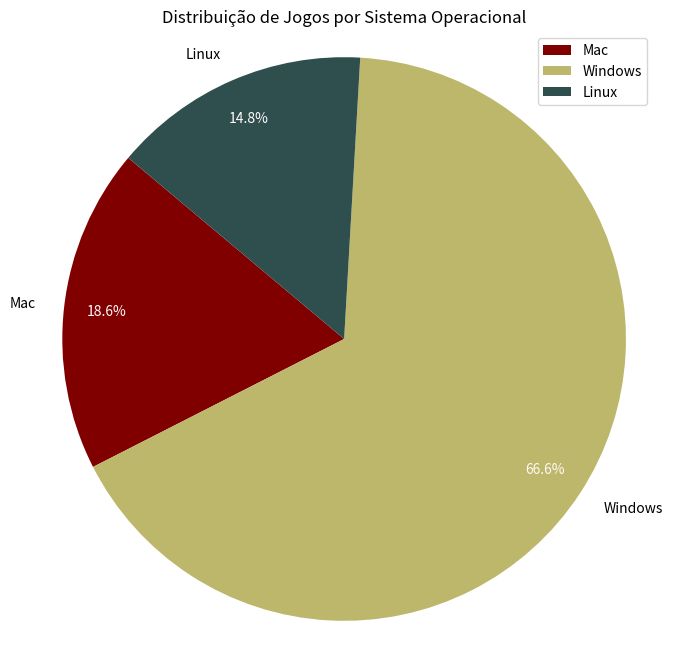

In [12]:
# Chamar a função para gerar o gráfico de votos por sistema operacional
dados.gerar_grafico_distribuicao_jogos_so(df)


Múltiplos Sistemas Operacionais, contando "votos" para cada SO

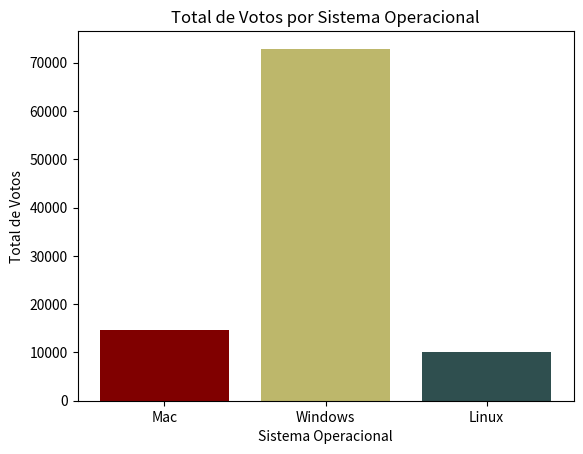

In [13]:
dados.gerar_grafico_votos_por_so(df)

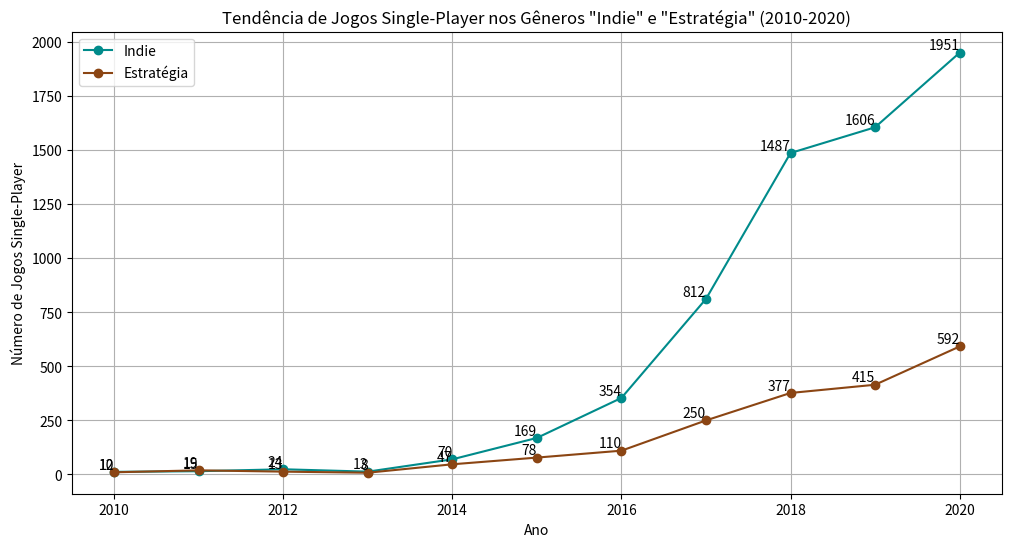

In [14]:
plt = dados.tendencia_jogos_singleplayer(df)


<h4>Abaixo será criada perguntas minha para a resposta do negócio: </h4>

<h4><b>Pergunta 1:</b> Os 10 maiores jogos com maiores notas de acordo com o usuário</h4>

In [15]:
top_10_jogos = dados.obter_top_10_jogos(df)

# Imprima o DataFrame resultante
print(top_10_jogos)

         AppID                            Name  User score
2649    471720                       K Station         100
8563    961640        The Tower of Five Hearts         100
13285   935560               Hentai Strip Shot         100
41482  1013180                  Funbag Fantasy         100
59587   912190                Hentai IQ Puzzle         100
46041   868980      DEEP SPACE WAIFU: NEKOMIMI          98
13906   723090                    Meltys Quest          97
58820  1004650                       Unlock Me          96
51156   560000            Ladykiller in a Bind          95
56379   639780  Deep Space Waifu: FLAT JUSTICE          95


<h4><b>Pergunta 2: </b>10 Jogo com maior tempo médio jogado</h4>

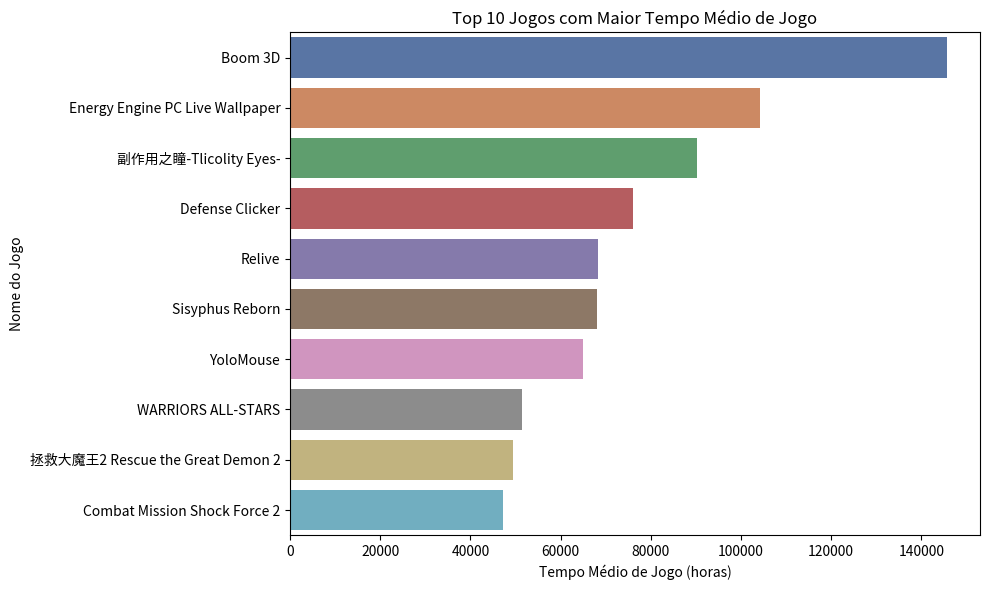

In [16]:
dados.gerar_histograma_top_10_jogos(df)
